In [9]:
from evaluation_metric import *
from baseline_model import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import gc
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_pickle('Data/train_agg_mo.pkl')
train_labels = pd.read_pickle('Data/train_labels.pkl').loc[train_data.index]

train_data.shape, train_labels.shape

((458913, 1009), (458913, 1))

In [3]:
remove_columns = False
if remove_columns:
    num_predictors = pd.read_csv('Data/num_f_t.csv')['Feature'].values
    feature_names = []
    for i in num_predictors:
        feature_names.append(i.split()[0])
    feature_names.remove('target')

    to_remove = feature_names[150:]

    for i in to_remove:
        to_drop = train_data.columns[train_data.columns.str.startswith(i)]
        train_data.drop(columns=to_drop, axis=1, inplace=True)

    train_data.shape

In [4]:
models, df_scores, importances, df_results = base_model_lgbm(train_data, train_labels)

Fold: 0 - seed: 0
[LightGBM] [Info] Number of positive: 95062, number of negative: 272068
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.597992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233577
[LightGBM] [Info] Number of data points in the train set: 367130, number of used features: 1006
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258933 -> initscore=-1.051523
[LightGBM] [Info] Start training from score -1.051523
Training until validation scores don't improve for 1500 rounds
[500]	valid_0's binary_logloss: 0.231293	valid_0's AMEX: 0.776603
[1000]	valid_0's binary_logloss: 0.222998	valid_0's AMEX: 0.787514
[1500]	valid_0's binary_logloss: 0.220653	valid_0's AMEX: 0.790105
[2000]	valid_0's binary_logloss: 0.21978	valid_0's AMEX: 0.791068
[2500]	valid_0's binary_logloss: 0.219372	valid_0's AMEX: 0.791823
[3000]	valid_0's binary_logloss: 0.219087	valid_0's AMEX: 0.792219
[3500]	valid_0's

In [5]:
pickle.dump(models, open("Models/models_baseline_5.pkl", "wb"))
pickle.dump(importances, open("Models/importances_baseline_5.pkl", "wb"))

In [6]:
df_results

seed,0,fold_mean
fold,,
0,0.793554,0.793554
1,0.791364,0.791364
2,0.792758,0.792758
3,0.795717,0.795717
4,0.793075,0.793075
seed_mean,0.793294,0.793294


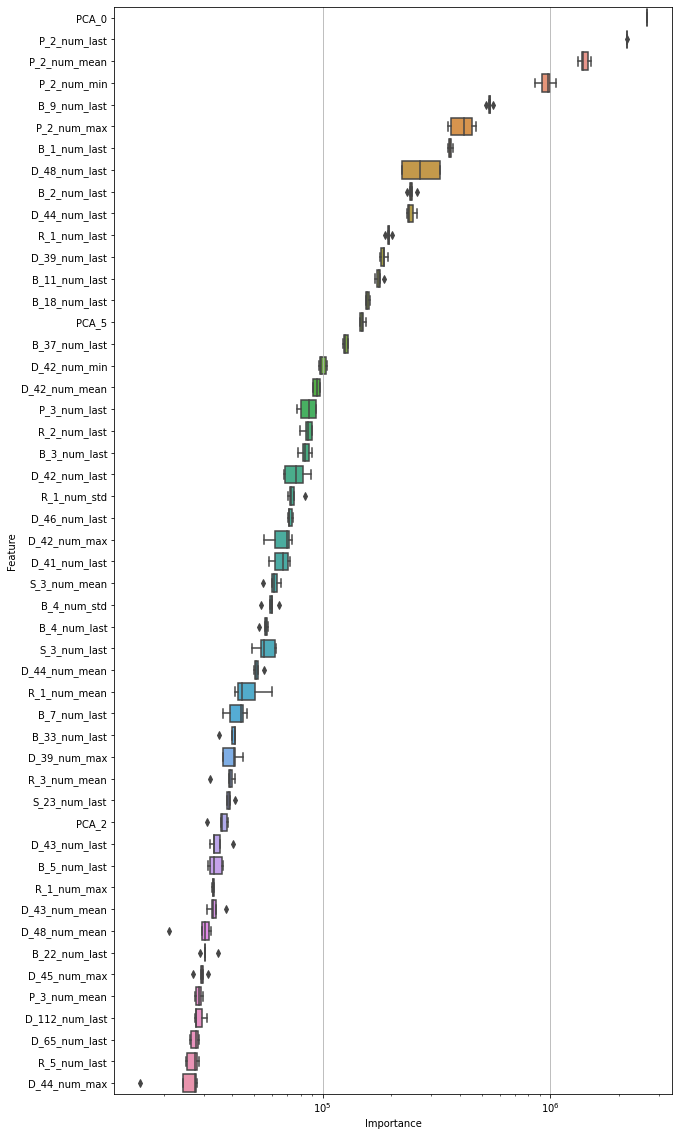

In [7]:
importances = pickle.load(open("Models/importances_baseline_5.pkl", "rb"))
def plot_importance(ii, features, PLOT_TOP_N = 50, figsize=(10, 10)):
    importance_df = pd.DataFrame(data=importances, columns=features)
    sorted_indices = importance_df.median(axis=0).sort_values(ascending=False).index
    sorted_importance_df = importance_df.loc[:, sorted_indices]
    plot_cols = sorted_importance_df.columns[:PLOT_TOP_N]
    _, ax = plt.subplots(figsize=figsize)
    ax.grid()
    ax.set_xscale('log')
    ax.set_ylabel('Feature')
    ax.set_xlabel('Importance')
    sns.boxplot(data=sorted_importance_df[plot_cols],
                orient='h',
                ax=ax)
    plt.show()
    
plot_importance(np.array(importances),train_data.columns, PLOT_TOP_N = 50, figsize=(10, 20))

In [10]:
del train_data, train_labels
gc.collect()
test_data = pd.read_pickle('Data/test_agg_mo.pkl')
models = pickle.load(open("Models/models_baseline_5.pkl", "rb"))

In [11]:
prediction_list = []
for keys in models.keys():
    prediction_list.append(models[keys].predict(test_data))

prediction_df = pd.DataFrame(prediction_list).T
prediction_df.index = test_data.index

In [12]:
prediction_df.mean(axis=1).to_csv('Output/p_baseline_5_test.csv', header=['prediction'])

In [13]:
del test_data
gc.collect()
train_data = pd.read_pickle('Data/train_agg_mo.pkl')
models = pickle.load(open("Models/models_baseline_5.pkl", "rb"))

In [14]:
prediction_list = []
for keys in models.keys():
    prediction_list.append(models[keys].predict(train_data))

prediction_df = pd.DataFrame(prediction_list).T
prediction_df.index = train_data.index

In [15]:
prediction_df.mean(axis=1).to_csv('Output/p_baseline_5_train.csv', header=['prediction'])